<a href="https://colab.research.google.com/github/codestates/ds-cs-section4-sprint3/blob/main/sc43x_forStudents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *SC43x*
# Major Neural Network Architectures

이번 스프린트 챌린지에서는 데이터 사이언스 분야에서 인지도가 높은 안정된 기술들을 다뤄보게 됩니다. 이번 한 주간 CNN, RNN, LSTM, Autoencoder, GAN 등 다양한 주요 신경망 구조들에 대해서 배워봤습니다. 오늘은 그 모델들을 복습하는 시간을 가지도록 하겠습니다. 이 SC는 **신경망 구조에 대한 이해와 지식**을 평가합니다. 높은 정확도를 가진 모델을 학습 시킬 수 있는지를 평가하려는 것이 아닙니다.

__*주의:*__  아래의 방식들은 복잡한 연산을 요구합니다. 모든 파트의 문제들은 어떤 환경에서라도 (e.g. 로컬 주피터, Google Colab, etc.) **5-10분 내외**로 결과값이 나오도록 제작이 됐기 때문에 만일 결과값을 도출하는데 그 이상의 시간이 걸린다면 여러분의 접근 방식을 재점검해보시기 바랍니다.

## 목차
* <a href="#p1">Part 1</a>: LSTM
* <a href="#p2">Part 2</a>: CNN
* <a href="#p3">Part 3</a>: Autoencoder
* <a href="#p4">Part 4</a>: Free Response

<a id="p1"></a>
## Part 1. LSTM
> LSTM을 활용해서 로이터 신문 기사를 주제별로 분류하는 다중분류 모델을 학습하세요. 데이터는 이미 LSTM 모델에 사용 될 수 있도록 적절하게 인코딩이 완료 됐습니다. 

수업에서 활용했었던 LSTM과 [Keras IMDB sentiment classification](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/reuters/load_data)를 참고해서 문제를 푸신다면 도움이 되실 것입니다.

__*주의:*__  모델의 성능을 최대한 끌어올리는 것이 아닌 모델 구동에 초점을 맞춰주시길 바랍니다. 모든 문제를 완료 한 후에도 "시간이 남았다면" 정확도를 올리는 것에 도전하시는 것을 추천 합니다.

### 1.1 Keras를 활용해서 분류 예측 모델을 학습 후, 기사들을 주제별로 분류하세요

In [1]:
# 데이터셋을 불러옵니다
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=202012,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# 인코딩 확인
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
label = set(y_test)
print(label)
print(len(label)+1)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}
46


In [4]:
import numpy as np
lenmax = len('1')
for x in X_train:
  tmp = len(x)
  lenmax = np.maximum(lenmax, tmp)
print(lenmax)

2376


In [5]:
# 아래 코드를 바꾸지 마십시오. +1은 반드시 있어야 합니다.
max_features = len(word_index.values()) + 1
print(max_features)

# 이 곳에 답안을 작성하십시오

30980


30980

### 1.2 모델의 성능 및 정확도를 계산하세요

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100

X_train = pad_sequences(X_train, maxlen = max_len) # 훈련 데이터 벡터 변환
X_test = pad_sequences(X_test, maxlen = max_len) # 테스트 데이터 벡터 변환

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_y_train = to_categorical(y_train) # 라벨 카테고리화
one_hot_y_test = to_categorical(y_test) # 라벨 카테고리화

In [8]:
# 훈련, 검증 데이터 분류
X_val = X_train[:1000] # 트레인 데이터중 1000개 검증 데이터로 분류
partial_X_train = X_train[1000:] # 트레인 데이터 분류

y_val = one_hot_y_train[:1000]
partial_y_train = one_hot_y_train[1000:]

In [22]:
# 이 곳에 답안을 작성하십시오
# 46개의 class로 구성되어 있으니, Top 5(41번째), 중위값(25번째) accuracy도 확인할 수 있는 코드를 넣어보세요 (도전과제).

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
import tensorflow as tf

# 모델 생성
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(max_features, 128),
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
  tf.keras.layers.Dense(46, activation='softmax')
])

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=[tf.keras.metrics.TopKCategoricalAccuracy(name= 'Top 5', k = 41), tf.keras.metrics.TopKCategoricalAccuracy(name= '중위값', k = 25), 'accuracy']
)

# 모델 요약
model.summary()

# 모델 훈련
train = model.fit(partial_X_train, partial_y_train,
          batch_size=512, 
          epochs=20, 
          validation_data=(X_val,y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 46)                5934      
Total params: 4,102,958
Trainable params: 4,102,958
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 35s 2s/step - loss: 3.2607 - Top 5: 0.9763 - 중위값: 0.8817 - accuracy: 0.3343 - val_loss: 2.5563 - val_Top 5: 0.9720 - val_중위값: 0.8910 - val_accuracy: 0.3510
Epoch 2/20
16/16 [==============================] - 31s 2s/step - loss: 2.4535 - Top 5: 0.9901 - 중위값: 0.9341 - accuracy: 0.3534 - val_loss: 2.4225 - val_Top 5: 0.9870

### 1.3 아래의 질문에 답하세요

#### a) 데이터셋을 학습할 때 사용하는 `pad_sequences`  메소드에 대해 설명하세요. 어떤 기능을 하나요? 왜 모델을 학습할 때 필요한가요?

#### b) 종래의 RNN(Recurrent Neural Networks) 대신 LSTM (Long-ShortTerm Memory Cell unit)을 사용하는 주요한 동기는 무엇인가요? (i.e. RNN에 비해 LSTM의 좋은 점을 설명하세요)

#### c) LSTM이나 RNN을 사용하는 예시를 **3개** 제시하고 왜 해당 경우에 사용하는게 적절한지 간단하게 설명하세요.


a) pad_sequences 메소드에 대한 설명

어떤 기능을 하는가 ? : 
가변 시퀀스들을 채우기 위해서 사용하며, 부자연스러운 시퀀스 문제를 해결하기 위해서 사용한다.

왜 모델을 학습할 때 필요한가 ? :
기계는 전부 동일한 길이의 문서에 대해서는 하나의 행렬로 보고 묶어서 연산 할 수 있기 때문에 pad_sequences로 길이를 일정하게 맞춰서 사용한다.


b) RNN 대신 LSTM을 사용하면 좋은 이유

RNN의 문제인 오래된 연산에 대한 정보의 소실이 LSTM에서는 Cell State를 통해 역전파 과정에서 활성화 함수를 거치지 않아 기울기 소실 문제가 일어나지 않는다. 하여 문장이 길어져도 앞쪽 시퀀스의 정보를 어느정도 잃지 않을 수 있다.


c) 예시 3가지 ) 주식 가격 예측, 글자 번역, 문장에 대한 감정분석

이유 : 앞의 정보가 뒤의 정보에 영향을 줄 때 주로 사용한다. 

주식 가격의 경우 이전 종가, 시가가 다음날 시세에 영향을 미치기 때문에 사용하고, 글자 번역 같은 경우 글의 문맥에 따라 같은 단어여도 의미가 달라지기에 사용한다. 그리고 문장을 읽어 문장에 대한 감정 분석을 하여 좋고 싫음을 판별할 때 사용한다.

---

<a id="p2"></a>
## Part 2. CNN

### 객체 탐지 모델
Keras와  [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained)을 활용하여 `im_frog` 폴더에 있는 이미지 중 어떤 이미지에 개구리가 있는지 찾는 객체 탐지 모델을 만들어 보겠습니다 (주의: 해당 이미지들을 Colab에 업로드 하셔야 합니다. 폴더이름은 다른 것을 사용하셔도 좋고, 아래 코드에서도 같이 바꾸셔야 합니다.)

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

In [10]:
# 아래의 코드를 실행하면 skimage의 함수가 모든 이미지를 메모리로 읽어들입니다.
from skimage.io import imread_collection

images = imread_collection('./im_frog/*.jpg')

In [11]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



## 2.1 Resnet$V_2$을 사용하기위해서 전처리 함수를 사용하여 이미지를 전처리 하고 이미지들의 사이즈를 재조정하세요 (Hint: scikit-image)

In [12]:
# 예측 이미지 전처리 사이즈 조절 (256, 256)
from skimage.transform import resize

for idx in range(len(images)):
  globals()['resize_img{}'.format(idx)] = resize(images[idx], (256, 256))

In [13]:
# 리사이즈 이미지 확인
resize_img0.shape, resize_img14.shape

((256, 256, 3), (256, 256, 3))

In [14]:
import tensorflow as tf

In [15]:
# resnet50_v2 불러오기
resnet50_v2 = tf.keras.applications.resnet_v2.ResNet50V2(
                include_top=False, weights='imagenet', input_tensor=None,
                input_shape=(256, 256, 3), pooling=None, classes=1000,
                classifier_activation='softmax'
) 

94683136/94668760 [==============================] - 1s 0us/step


## 2.2 ResNet50v2 모델을 사용해 `images`를 분류하세요. 예측 결과는 자유롭게 출력하세요.
> 참고: `ResNet50v2`는 "frog"로 예측하지 않습니다. "frog"의 label은 "bullfrog, treefrog, tailed frog"입니다

In [16]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D

# 이전 모델 그대로 사용 할 시 : False
resnet50_v2.trainable=False

# 모델 생성
model = Sequential([
                 resnet50_v2,
                 Dense(512,activation='relu'),
                 BatchNormalization(),
                 tf.keras.layers.GlobalAveragePooling2D(),
                 Dense(1000, activation='softmax')
])

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 8, 8, 2048)        23564800  
_________________________________________________________________
dense (Dense)                (None, 8, 8, 512)         1049088   
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 512)         2048      
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              513000    
Total params: 25,128,936
Trainable params: 1,563,112
Non-trainable params: 23,565,824
_________________________________________________________________


(256, 256, 3)


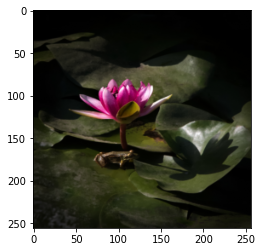

In [18]:
import matplotlib.pyplot as plt

# 이미지 확인
plt.imshow(resize_img0)
print(resize_img0.shape)

In [19]:
# 모델 컴파일
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

resize_img = np.array([globals()['resize_img{}'.format(idx)] for idx in range(15)])

# 이미지 예측
pred = model.predict(resize_img)

In [20]:
pred.shape

(15, 1000)

In [41]:
decode_predictions(pred)[14][0][1]

'American_lobster'

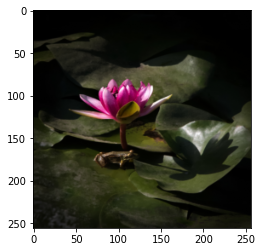

결과 :  Ibizan_hound
--------------------------------------------------


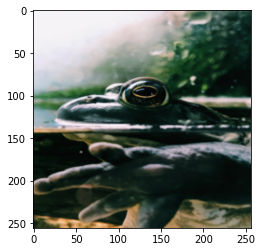

결과 :  desk
--------------------------------------------------


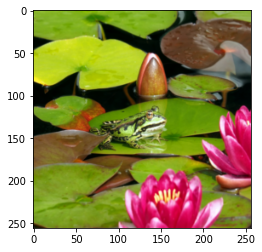

결과 :  desk
--------------------------------------------------


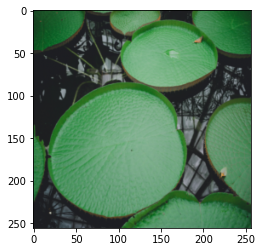

결과 :  desk
--------------------------------------------------


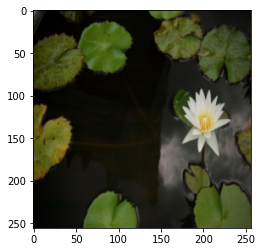

결과 :  patio
--------------------------------------------------


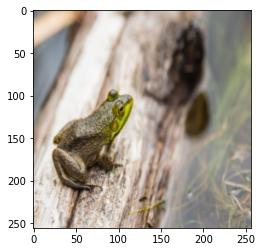

결과 :  carpenter's_kit
--------------------------------------------------


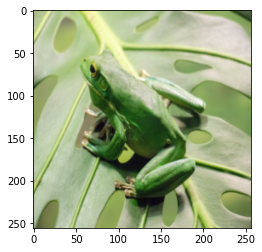

결과 :  desk
--------------------------------------------------


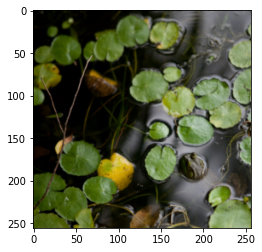

결과 :  desk
--------------------------------------------------


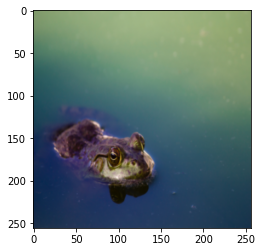

결과 :  desk
--------------------------------------------------


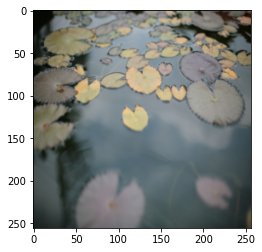

결과 :  Welsh_springer_spaniel
--------------------------------------------------


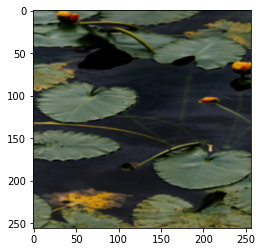

결과 :  monitor
--------------------------------------------------


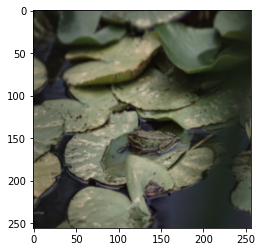

결과 :  desk
--------------------------------------------------


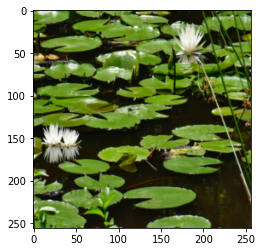

결과 :  beer_bottle
--------------------------------------------------


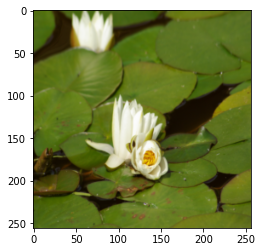

결과 :  Ibizan_hound
--------------------------------------------------


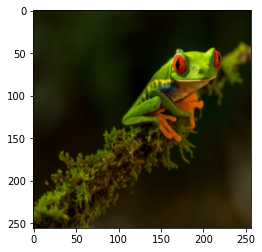

결과 :  American_lobster
--------------------------------------------------


In [42]:
# 예측 결과
for idx in range(15):
  plt.imshow(globals()['resize_img{}'.format(idx)])
  plt.show()
  print('결과 : ',decode_predictions(pred)[idx][0][1])
  print('--------------------------------------------------')

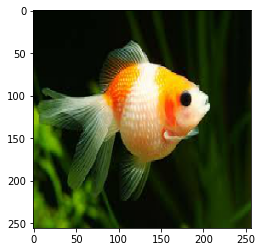

In [55]:
from tensorflow.keras.preprocessing import image

# 물고기 이미지 불러오기
fish = image.load_img('/content/images.jpg', target_size=(256, 256))
plt.imshow(fish)

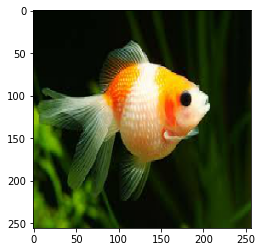

결과 :  mobile_home
--------------------------------------------------


In [58]:
# 예측
fish = np.array([np.array(fish)])
fish_pred = model.predict(fish)

# 결과
plt.imshow(fish[0])
plt.show()
print('결과 : ',decode_predictions(fish_pred)[0][0][1])
print('--------------------------------------------------')

---

<a id="p3"></a>
# Part 3. Autoencoders

## 3.1 오토인코더의 동작 원리와 Latent의 크기를 조절했을 때 달라지는 변화에 대해서 설명해보세요.

`답안 작성은 이 곳에 하시길 바랍니다`
<br><br><br><br>
입력 데이터 자체를 레이블로 활용하는 학습 방식이다. 

입력 받은 데이터를 인코더 내에서 필요한 특성을 추출한 다음 디코더에서 입력받은 데이터의 형태만큼의 데이터를 생성해 내는 과정이다.

Latent 크기를 조절했을 때 필요한 특성을 추출하는 차원의 크기가 달라진다.

---

<a id="p4"></a>
# Part 4. Free Response
> 동료들에게 설명한다고 생각하고 간단하게 몇 문장으로 작성하세요.

### 4.1 데이터 과학자로서 본인의 강점은 무엇이라고 생각하시나요?

막히는 문제에서 포기하지 않고 그 문제를 해결하기 위해 평상시에 늘 생각하면서 답을 찾기 위해 노력하는 점이 데이터 과학자로서 나의 강점이라고 생각 합니다.

### 4.2 데이터 과학의 다양한 분야 중에서 좀 더 심도있게 배우고 싶은 분야는 무엇인가요? 그 이유는 무엇인가요?

인공 지능 (AI) 에 대해 배우고 싶습니다.

이유는 미래에 있을 가상현실 내에 인공지능 객체만으로 살아가는 생태계를 구축해보고 싶습니다.

### 4.3 앞으로 5년 뒤, 데이터과학 분야는 어떻게 바뀌어 있을까요? 왜 그렇게 생각하시나요?

모든 분야에 인공지능의 이름이 다 들어가 있게 될 것 같습니다.

인간의 두뇌로는 연산할 수 없는 계산들, 정보의 수집력, 기억력들을 따라갈 수 없는데 이를 활용하기 위해 인공지능이 결합되면 컴퓨터를 효율적으로 사용할 수 있기 때문입니다.

### 4.4 인공지능이 우리 사회에 위협이 될 수도 있다는 주장에 대해서 어떻게 생각하시나요? 그 이유는 무엇인가요?


핵과 마찬가지로 위협이 될 수 있다고 생각 합니다. 인공지능 자체가 자체적으로 우리를 몰살한다든가 그런 의미는 아니지만, 인공지능을 어떻게 사용하느냐에 따라 우리 사회에 악영향을 충분히 미칠 수 있다고 생각합니다. 하지만 이에 사람들은 해결책을 마련하고 규제를 세울 것 입니다.

### 4.5 위에서 명시한 위협들에 대한 대처 방안은 어떤 것이 있을까요? 또한 반대로 인공지능이 우리 사회에서 도움이 된다면 어떤 부분이 있고 왜 그렇게 생각하시나요? 

인공지능 이용에 대한 규제를 지정하고 천천히 연구해 나가면 서로 발전할 수 있다고 생각합니다. 

우리 사회에 도움이 되는 부분이라면, 예를 들어 바둑에서도 인공지능의 처음 보는 수를 보며 우리는 저게 맞는 수 인가 라는 의문을 하였지만 그로 인해 한두점 차이로 패배를 하면서 우리가 알고 있던 바둑의 수에 대한 시각이 많이 바뀌었습니다. 따라서 많은 정보를 통해 사람의 편협한 시점에서 바라보지 못하는 부분을 볼 수 있으며, 새로운 시야로 살펴 볼 수 있다고 생각 합니다.

### 4.6 여러분이 생각하실 때 Strong AI라고 불리우는 [일반 인공지능 (Artificial General Intelligence)](https://ko.wikipedia.org/wiki/%EC%9D%B8%EA%B3%B5_%EC%9D%BC%EB%B0%98_%EC%A7%80%EB%8A%A5)을 개발해내는 것이 가능할까요? 왜 그렇게 생각하시나요?

사람의 모든 정보들을 갈아 넣으면 인간처럼 행동하는 AI를 만들 수 는 있겠지만, 정말 인간과 같아지려면 생물학적인 발전도 같이 이뤄져야 가능할것이라 생각 합니다.

### 4.7 Continous learning에 대해서 검색 해보고 이해한 내용을 설명 해보세요.

새로운 학습을 할 때마다 지속적으로 성능을 향상시키는 과정입니다.

# Advanced Goals: 3점을 받기 위해서는 아래의 조건 중에서 3개 이상을 달성하셔야 합니다
### Part 1
    - Top 5, Median(25) 번째 acc를 나타내며 학습하는 방식을 찾아보시오.
### Part 2
    - 개구리 이외의 다른 객체를 탐지하는 모델을 만들어보세요 (예: 물고기)
    - 이미지를 예측한 label과 같이 출력해보세요
    - 예측 모델을 함수로 만들어 보세요 (물론 주석도 잘 되있어야 합니다)
### Part 3
    - 간단한 코드를 첨부하여 설명하세요.
### Part 4
    - 작성한 답안을 몇 문장보다 조금 더 상세하게 작성해보세요
    - 왜 그렇게 생각하게 되었는 지 관련 근거를 서술하세요.
### Add
    - 최근에 발행된 GAN을 이용한 프로젝트를 새롭게 구현해보세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다.